In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
from statsmodels.stats.diagnostic import het_breuschpagan
from scipy import stats
from statsmodels.stats.diagnostic import het_white



# import statsmodels.formula.api as sms

pd.set_option('display.max_columns', None)  # Отображать все колонки


In [2]:
df, meta = pyreadstat.read_sav('data2021.sav')
# df = pd.read_stata('r29i_os_73.dta', convert_categoricals=False)

In [3]:
# df = df.dropna(axis=1)
df = df.drop_duplicates()

In [4]:
# print("Размерность датафрейма:")
# print(df.shape)
# print()
# missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
# missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
# unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

# missing_summary = pd.DataFrame({
#     'Missing Values Count': missing_values_count,
#     'Missing Values Percentage': missing_values_percentage,
#     'Unique Values Count': unique_values_count
# })

# print("Сводка по отсутствующим значениям и уникальным значениям:")
# display(missing_summary)

In [5]:
df = df[(df['region'] == 137) | (df['region'] == 141)].copy()

In [6]:
# df[['zj125.6', 'zj721631', 'zj721632', 'zj721635', 'zj72.171', 'zj73', 'zj77', 'zj87', 'zj90', 'zj200']]
# filtered_columns = [col for col in df.columns if 'j72.171' in col]
# filtered_columns
 # 'zj72.171', 'zj73', 'zj77', 'zj87', 'zj90' -- Нашлись

In [7]:
# df['zh6'].value_counts()

In [8]:
filtered_columns = [col for col in df.columns if '1.1' in col]
print(filtered_columns)

['zj1.1.1', 'zj1.1.2', 'zj1.1.3', 'zj1.1.4', 'zj11.1', 'zj41.1', 'zj401.1a', 'zj131.1', 'zj81.1', 'zn1.1', 'zn31.1', 'zs1.1', 'zk761.1a', 'zk761.1b', 'zk761.1c']


In [9]:
# df['zj10'].isna().sum()

In [10]:
# # Инициализируем пустой список для хранения реальных имен колонок
# selected_columns = []

# # Проходим по каждой подстроке и ищем соответствующие колонки
# for substr in substrings:
#     # Ищем соответствующие колонки (учитывая регистр)
#     matching_cols = [col for col in df.columns if substr in col]
#     # Если колонки не найдены, пробуем поиск без учета регистра
#     if not matching_cols:
#         matching_cols = [col for col in df.columns if substr.lower() in col.lower()]
#     # Добавляем найденные колонки в список
#     if matching_cols:
#         selected_columns.extend(matching_cols)
#     else:
#         print(f"Колонки для подстроки '{substr}' не найдены")

# # Удаляем возможные дубликаты
# selected_columns = list(set(selected_columns))

# # Теперь отфильтруем ваш датафрейм по этим колонкам
# df_filtered = df[selected_columns].copy()

In [11]:
# df[['zj13.2']]

In [12]:
l = [
    'H5', 'H6', 'AGE', 'EDUC', 'DIPLOM', 'MARST', 'OCCUP08',  
    'J6', 'J6.1', 'J6.2', 'J8', 'STATUS', 'J4.1', 'J10', 'J11.1', 'J14', 'J21A', 'J23', 'J29',
'J32.1', 'J35.1', 'J72.5', 'J260'
# 'zj161.3y', 'zj161.3m'
]

# significant_features2 = [
#     "J72.17",  # Семейное положение
#     "J322",  # Состоит ли в зарегистрированном браке
#     "J77",  # Наличие работы у респондента
#     "J78",  # Опыт работы
#     "J79",  # Общий трудовой стаж
# ]



In [13]:
# filtered_columns = [col for col in df.columns if 'j8' in col]
# print(filtered_columns)
itog_list = ['zj13.2', 'zj9', 'zh5', 'zh6', 'z_age', 'z_educ', 'z_diplom', 'z_marst', 'z_occup08', 'zj6', 'zj6.1a', 'zj6.2', 'zj8', 'status', 'zj4.1',
'zj10', 'zj11.1', 'zj14', 'zj21a', 'zj23', 'zj29', 'zj32.1', 'zj35.1', 'zj69.9c', 'zj75', 'zj260', 'zl2.2', 'region', 
            
'zj72.171', 'zj73', 'zj77', 'zj87', 'zj90',
            
            'zj161.3y', 'zj1.1.1']
# zi4	

In [14]:
filtered_columns = [col for col in df.columns if '72.172' in col]
print(filtered_columns)

['zj72.172']


In [15]:
len(itog_list)

35

In [16]:
df = df[itog_list].copy()

In [17]:
# df['zj161.3m'].value_counts()

In [18]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(790, 35)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
zj13.2,425,53.80,65
zj9,388,49.11,2
zh5,0,0.00,2
zh6,0,0.00,91
z_age,0,0.00,176
z_educ,119,15.06,20
z_diplom,119,15.06,7
z_marst,119,15.06,8
z_occup08,388,49.11,9
zj6,388,49.11,2


In [19]:
df_filter = df.loc[:, df.isna().mean() < 0.6] # Оставляю те колонки где меньше 60 процентов пропусков

In [20]:
print("Размерность датафрейма:")
print(df_filter.shape)
print()
missing_values_count = df_filter.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df_filter.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df_filter.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(790, 32)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
zj13.2,425,53.80,65
zj9,388,49.11,2
zh5,0,0.00,2
zh6,0,0.00,91
z_age,0,0.00,176
z_educ,119,15.06,20
z_diplom,119,15.06,7
z_marst,119,15.06,8
z_occup08,388,49.11,9
zj6,388,49.11,2


In [21]:
# ПОТЕНЦИАЛЬНЫЕ ЦЕЛЕВЫЕ ПЕРЕМЕННЫЕ:
# 'zj13.2'	
# 'zj10'

In [22]:
 # Больше чем сколько колонок должно быть отсутствующие значения в строках? 
# col = df_filter[df_filter.isna().sum(axis=1) > 13].columns
# len(col)

In [23]:
# df_filter.dropna(thresh=9) # Дропаю строки в которых есть хотя бы 9

In [24]:
# df_filter[df_filter.isna().sum(axis=1) > 13]

In [25]:
# df_filter = df_filter.drop('zj13.2', axis=1)

In [26]:
df_filter['region'].value_counts()

region
141.0    425
137.0    365
Name: count, dtype: int64

In [27]:
df_filter.loc[:, :] = df_filter.where(df_filter <= 99999, np.nan)

C:\Users\MadBoss\AppData\Local\Temp\ipykernel_7152\260474843.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter.loc[:, :] = df_filter.where(df_filter <= 99999, np.nan)


In [28]:
# df_filter.loc[df_filter > 9999999] = np.nan
print("Размерность датафрейма:")
print(df_filter.shape)
print()
missing_values_count = df_filter.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df_filter.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df_filter.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(790, 32)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
zj13.2,448,56.71,56
zj9,388,49.11,2
zh5,0,0.00,2
zh6,0,0.00,91
z_age,0,0.00,176
z_educ,123,15.57,19
z_diplom,123,15.57,6
z_marst,122,15.44,6
z_occup08,388,49.11,9
zj6,388,49.11,2


In [29]:
df_filter = df_filter.drop('zj13.2', axis=1)
# Дропаю эту колонку тк в ней больше nan чем в zj10

In [30]:
df = df_filter.copy()
df

,zj9,zh5,zh6,z_age,z_educ,z_diplom,z_marst,z_occup08,zj6,zj6.1a,zj6.2,zj8,status,zj4.1,zj10,zj11.1,zj14,zj21a,zj23,zj29,zj32.1,zj69.9c,zj260,zl2.2,region,zj72.171,zj73,zj77,zj90,zj161.3y,zj1.1.1
1149,NaN,2.0,1947.0,74.5,18.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,31.0,NaN
1150,NaN,1.0,1938.0,83.0,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,48.0,NaN
1151,NaN,2.0,1940.0,81.5,7.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,38.0,NaN
1152,1.0,2.0,1968.0,52.5,16.0,4.0,2.0,8.0,2.0,12.0,48.0,192.0,2.0,1.0,15000.0,1.0,2.0,1.0,2.0,2.0,2.0,1968.0,2.0,2.0,137.0,1.0,2.0,1.0,12.0,31.0,2.0
1153,1.0,1.0,1962.0,58.5,18.0,5.0,2.0,7.0,2.0,8.0,40.0,160.0,2.0,14.0,14000.0,1.0,2.0,2.0,2.0,2.0,2.0,1962.0,2.0,2.0,137.0,1.0,2.0,1.0,12.0,38.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11821,NaN,2.0,1955.0,66.5,8.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.0,2.0,2.0,141.0,1.0,1.0,2.0,4.0,39.0,NaN
11822,NaN,1.0,2021.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN
11823,NaN,2.0,2021.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2021.0,NaN,NaN,141.0,NaN,NaN,NaN,NaN,NaN,NaN
11824,1.0,1.0,1968.0,53.5,18.0,5.0,3.0,7.0,2.0,6.0,30.0,126.0,1.0,10.0,21800.0,NaN,2.0,2.0,1.0,2.0,2.0,1968.0,2.0,2.0,141.0,2.0,2.0,1.0,12.0,30.0,2.0


In [31]:
clear_df = df.dropna(axis=0, how='any')

In [32]:
clear_df['region'].value_counts()

region
137.0    136
141.0    133
Name: count, dtype: int64

In [33]:
data_dict = {
"zj13.2": "avg_wage_year",
"zj9": "is_income_30_days",
"zh5": "sex",
"zh6": "birth_year",
"z_age": "age",
"z_educ": "education",
"z_diplom": "diplom",
"z_marst": "family",
"z_occup08": "proff_group",
"zj6": "is_ceo",
"zj6.1a": "work_day_hours",
"zj6.2": "work_week_hours",
"zj8": "actual_hours_30d",
"status": "settlement_type",
"zj4.1": "industry",
"zj10": "income_30d",
"zj11.1": "officially_employed",
"zj14": "company_debt",
"zj21a": "paid_leave",
"zj23": "state_owner",
"zj29": "entrepreneur_activity",
"zj32.1": "additional_job",
"zj69.9c": "birth_year2",
"zj260": "foreign_language",
"zl2.2": "additional_health_insurance",
"region": "region",
"zj72.171": "children",
"zj73": "pension",
"zj77": "employment_status",
"zj90": "main_activity",
"zj161.3y": "work_exp",
"zj1.1.1": "job_satisfaction"
}

In [34]:
df = df.rename(columns=data_dict)
df.head(3)

,is_income_30_days,sex,birth_year,age,education,diplom,family,proff_group,is_ceo,work_day_hours,work_week_hours,actual_hours_30d,settlement_type,industry,income_30d,officially_employed,company_debt,paid_leave,state_owner,entrepreneur_activity,additional_job,birth_year2,foreign_language,additional_health_insurance,region,children,pension,employment_status,main_activity,work_exp,job_satisfaction
1149,NaN,2.0,1947.0,74.5,18.0,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1947.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,31.0,NaN
1150,NaN,1.0,1938.0,83.0,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1938.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,48.0,NaN
1151,NaN,2.0,1940.0,81.5,7.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1940.0,2.0,2.0,137.0,1.0,1.0,2.0,4.0,38.0,NaN


In [35]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(790, 31)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
is_income_30_days,388,49.11,2
sex,0,0.00,2
birth_year,0,0.00,91
age,0,0.00,176
education,123,15.57,19
diplom,123,15.57,6
family,122,15.44,6
proff_group,388,49.11,9
is_ceo,388,49.11,2
work_day_hours,405,51.27,12


In [36]:
df = df.dropna(subset=['income_30d'])

In [37]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(375, 31)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
is_income_30_days,0,0.00,1
sex,0,0.00,2
birth_year,0,0.00,55
age,0,0.00,99
education,2,0.53,13
diplom,2,0.53,5
family,0,0.00,6
proff_group,0,0.00,9
is_ceo,0,0.00,2
work_day_hours,11,2.93,11


In [38]:
# Не хочу жертвовать 40 строками поэтому буду удалять постепенно колонки менее важные на мой взгляд
# и смотреть сколько nan остается

# actual_hours_30d	
# work_week_hours
# officially_employed	
# company_debt
# paid_leave
# state_owner
# entrepreneur_activity	

# "zj6.2": "work_week_hours", Сколько часов в среднем продолжается Ваша обычная рабочая неделя?
# "zj8": "actual_hours_30d", Сколько часов Вы фактически отработали по основному месту работы в течение последних 30 дней?

# "zj11.1": "officially_employed", Устроен официально или нет
# Очень жалко терять эту колонку, есть идея заполнить нулями все что не является твердым да

# "zj14": "company_debt", Должно ли работнику предприятие какие то деньги? 
# "zj21a": "paid_leave", был ли работник в оплачиваемом отпуске за последний год
# "zj23": "state_owner", # Предприятие государственное?
# "zj29": "entrepreneur_activity", # Как вы считаете, вы занимаетесь предпринимательской деятельностью на этой работе?

In [39]:
# Пробую дропнуть:
# "zj21a": "paid_leave", был ли работник в оплачиваемом отпуске за последний год

In [40]:
df = df.drop(
    ['actual_hours_30d', 'work_week_hours', 'officially_employed', 'company_debt', 'paid_leave', 'state_owner', 'entrepreneur_activity'], axis=1
)

In [41]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(375, 24)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
is_income_30_days,0,0.00,1
sex,0,0.00,2
birth_year,0,0.00,55
age,0,0.00,99
education,2,0.53,13
diplom,2,0.53,5
family,0,0.00,6
proff_group,0,0.00,9
is_ceo,0,0.00,2
work_day_hours,11,2.93,11


In [42]:
df = df.dropna(subset=['work_day_hours', 'additional_job', 'foreign_language', 'education', 'industry', 'additional_health_insurance'])

In [43]:
df['region'].value_counts()

region
137.0    179
141.0    168
Name: count, dtype: int64

In [44]:
print("Размерность датафрейма:")
print(df.shape)
print()
missing_values_count = df.isna().sum()  # Общее количество пропущенных значений
missing_values_percentage = (df.isna().mean() * 100).round(2)  # Процент пропущенных значений
unique_values_count = df.nunique()  # Количество уникальных значений в каждом столбце

missing_summary = pd.DataFrame({
    'Missing Values Count': missing_values_count,
    'Missing Values Percentage': missing_values_percentage,
    'Unique Values Count': unique_values_count
})

print("Сводка по отсутствующим значениям и уникальным значениям:")
display(missing_summary)

Размерность датафрейма:
(347, 24)

Сводка по отсутствующим значениям и уникальным значениям:


,Missing Values Count,Missing Values Percentage,Unique Values Count
is_income_30_days,0,0.00,1
sex,0,0.00,2
birth_year,0,0.00,55
age,0,0.00,99
education,0,0.00,13
diplom,0,0.00,5
family,0,0.00,6
proff_group,0,0.00,9
is_ceo,0,0.00,2
work_day_hours,0,0.00,11


In [45]:
df = df.drop(['is_income_30_days'], axis=1)
# В этой колонке осталось всего одно уникальное значение, значит она константа и подлежит утилизации

In [46]:
# У нас две колонки с годом рождения
df = df.drop(['birth_year2', 'birth_year'], axis=1)

In [47]:
# Дропаю так как здесь константа - у всех есть работа
df = df.drop(['employment_status'], axis=1)

In [48]:
df['main_activity'].value_counts().sort_index()

# Подлежат обработке
# Дропаем education, main_activity industry, 

# при этом оставляем только diplom, делим на 3 группы 1, 2, 3
# family, 2 и 6 это в браке, остальные нет
# proff_group, (может коррелировать с is_ceo) - 1, 2 , 7 , 8 в одну группу (квал работники), остальных в другую

main_activity
5.0       1
6.0       6
11.0      4
12.0    304
13.0     30
16.0      2
Name: count, dtype: int64

In [49]:
# Дропаем education, main_activity industry
len(df.columns)
df = df.drop(['education', 'industry'], axis=1)
# 'main_activity'

In [50]:
def replace_family(value):
    if value in [2, 6]:
        return 1 # В браке 
    else:
        return 2 # Не в браке 

# Функция для замены значений в колонке 'proff_group'
def replace_proff_group(value):
    if value in [1, 2, 7, 8]:
        return 1 # Проф работник
    else:
        return 2 # Не проф работник

# Функция для замены значений в колонке 'diplom'
def replace_diplom(value):
    if value in [1, 2, 3, 4]:
        return 1  #  Школота
    elif value == 5: 
        return 2 # Шаражники
    elif value == 6:
        return 3 # Челики с умом (дипломом шараги только ВУЗа)

# Применяем функции к соответствующим колонкам
df['family'] = df['family'].apply(replace_family)
df['proff_group'] = df['proff_group'].apply(replace_proff_group)
df['diplom'] = df['diplom'].apply(replace_diplom)

In [51]:
df['region'].value_counts()

region
137.0    179
141.0    168
Name: count, dtype: int64

In [52]:
# # sns.scatterplot(data=df, y='income_30d', x = 'diplom', hue='diplom')
# sns.boxplot(data=df, y='income_30d', x = 'main_activity')#, hue='is_ceo')
# # plt.legend(loc=(1, 0))
# plt.xticks(rotation=60)
# plt.show()

In [53]:
# одну берем за базовую, например военнослужащие
# все остальные не военнослужащие
# Можно выбрать за базовую ту в которой больше всего наблюдений
# либо ту которая существенно отличается от остальных


In [54]:
df = df.dropna(subset=['work_exp'])

In [55]:
df = df.dropna(subset=['job_satisfaction'])

# "zj161.3y": "work_exp",
# "zj1.1.1": "job_satisfaction"

In [56]:
df = df.drop([3170, 6329, 1942, 7887, 11805, 7068, 7084], axis=0)

## Проверка корреляции

In [58]:
# np.linalg.cond(df)

In [59]:
df.shape

(326, 18)

In [60]:
df = df[df['region'] == 141].copy()
df = df.drop('region', axis=1)

In [61]:
df.shape

(150, 17)

In [62]:
# np.linalg.cond(df)

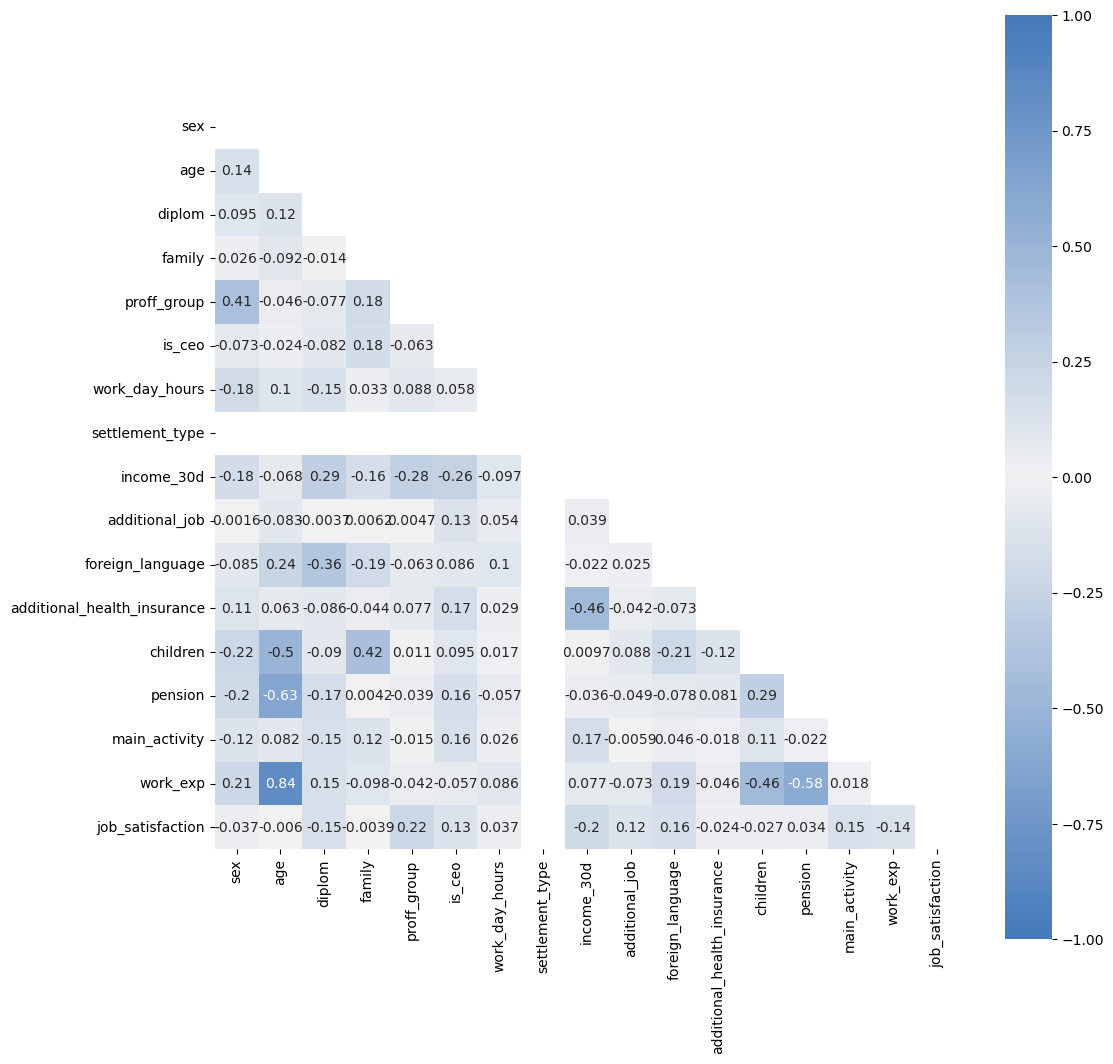

In [63]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr,
    mask=mask,
    cmap=sns.diverging_palette(250, 250, as_cmap=True),
    annot = True,
    vmin=-1.0, vmax=1.0, # всегда ставить от -1 до 1 ставим два одинаковых цвета на оба конца
    square=True,
    ax=ax);

In [64]:
# df['zj161.3y'].value_counts().sort_index()

In [65]:
# df['additional_job'].value_counts()
# df.nunique()

## Построение моделей

In [67]:
# clear_df = clear_df.rename(columns=data_dict)

In [68]:
# clear_df
# df = df[df['region'] == 137].copy()
# df = df.drop('foreign_language', axis=1)
df['age'] = df['age'] - df['age'].mean()
df['age^2'] = -df['age'] ** 2

In [69]:
df = df.rename({'additional_health_insurance': 'add_ins', 'job_satisfaction': 'job_sat', 'foreign_language': 'for_lan'}, axis=1)

In [70]:
y = np.log(df["income_30d"])
# X = df.drop(["income_30d", 'work_day_hours', 'additional_job', 'foreign_language', 'additional_health_insurance', 'settlement_type'], axis=1)
X = df.drop(["income_30d", 'settlement_type', 'additional_job', 'children', 'pension', 'work_day_hours', 'age^2', 'age', 'is_ceo'], axis=1)#, 'zj161.3y', 'foreign_language', 'additional_health_insurance', 'additional_job'], axis=1)
# 'settlement_type

X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()

results_table = model1.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.412
Model:                            OLS   Adj. R-squared:                  0.375
Method:                 Least Squares   F-statistic:                     10.92
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           9.10e-13
Time:                        20:51:12   Log-Likelihood:                -14.798
No. Observations:                 150   AIC:                             49.60
Df Residuals:                     140   BIC:                             79.70
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.8797      0.427     23.124

In [71]:
y = np.log(df["income_30d"])
# X = df.drop(["income_30d", 'work_day_hours', 'additional_job', 'foreign_language', 'additional_health_insurance', 'settlement_type'], axis=1)
X = df.drop(["income_30d", 'settlement_type', 'additional_job', 'children', 'pension', 'work_day_hours', 'age^2', 'age'], axis=1)#, 'zj161.3y', 'foreign_language', 'additional_health_insurance', 'additional_job'], axis=1)
# 'settlement_type

X = sm.add_constant(X)
model2 = sm.OLS(y, X).fit()

results_table = model2.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.441
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                     10.96
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           1.29e-13
Time:                        20:51:12   Log-Likelihood:                -11.081
No. Observations:                 150   AIC:                             44.16
Df Residuals:                     139   BIC:                             77.28
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.9907      0.420     23.766

In [72]:
y = np.log(df["income_30d"])
# X = df.drop(["income_30d", 'work_day_hours', 'additional_job', 'foreign_language', 'additional_health_insurance', 'settlement_type'], axis=1)
X = df.drop(["income_30d", 'settlement_type', 'additional_job', 'children', 'pension', 'work_day_hours', 'age^2'], axis=1)#, 'zj161.3y', 'foreign_language', 'additional_health_insurance', 'additional_job'], axis=1)
# 'settlement_type

X = sm.add_constant(X)
model3 = sm.OLS(y, X).fit()

results_table = model3.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.501
Model:                            OLS   Adj. R-squared:                  0.462
Method:                 Least Squares   F-statistic:                     12.62
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           2.84e-16
Time:                        20:51:12   Log-Likelihood:                -2.4761
No. Observations:                 150   AIC:                             28.95
Df Residuals:                     138   BIC:                             65.08
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.4266      0.422     22.364

In [73]:
y = np.log(df["income_30d"])
# X = df.drop(["income_30d", 'work_day_hours', 'additional_job', 'foreign_language', 'additional_health_insurance', 'settlement_type'], axis=1)
X = df.drop(["income_30d", 'settlement_type', 'additional_job', 'children', 'pension', 'work_day_hours'], axis=1)#, 'zj161.3y', 'foreign_language', 'additional_health_insurance', 'additional_job'], axis=1)
# 'settlement_type

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

results_table = model.summary()
print(results_table)

                            OLS Regression Results                            
Dep. Variable:             income_30d   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     11.76
Date:                Wed, 18 Dec 2024   Prob (F-statistic):           4.86e-16
Time:                        20:51:12   Log-Likelihood:                -1.5791
No. Observations:                 150   AIC:                             29.16
Df Residuals:                     137   BIC:                             68.30
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             9.5011      0.425     22.382

In [74]:
df.columns

Index(['sex', 'age', 'diplom', 'family', 'proff_group', 'is_ceo',
       'work_day_hours', 'settlement_type', 'income_30d', 'additional_job',
       'for_lan', 'add_ins', 'children', 'pension', 'main_activity',
       'work_exp', 'job_sat', 'age^2'],
      dtype='object')

In [75]:
# Нулевая гипотеза (H0): Коэффициент равен нулю, то есть переменная не имеет значимого влияния на зависимую переменную.
# Альтернативная гипотеза (H1): Коэффициент не равен нулю, то есть переменная имеет значимое влияние на зависимую переменную.

# P-value: Это вероятность получения наблюдаемых данных (или более экстремальных), если нулевая гипотеза верна.
# Если P-value меньше выбранного уровня значимости (обычно 0.05), это означает, что вероятность получения таких данных при верной 
# нулевой гипотезе слишком мала. Поэтому мы отвергаем нулевую гипотезу и принимаем, что коэффициент значим.

# Если P-value меньше 0.05, нулевая гипотеза отвергается, и коэффициент считается значимым.
# Если P-value больше или равно 0.05, нулевая гипотеза не отвергается, и коэффициент считается незначимым.

## Проверка предпосылок

In [77]:
# # Проверка автокорреляции (нужно только для данных зависимых во времени)

# dw_test = durbin_watson(model.resid)
# print(f"Durbin-Watson statistic: {dw_test}")

In [78]:
# Тест Дарбина-Уотсона возвращает значение статистики, которое лежит в диапазоне от 0 до 4. Интерпретация этого значения следующая:

# Значение около 2 предполагает отсутствие автокорреляции.
# Значение, значительно меньшее 2, предполагает положительную автокорреляцию.
# Значение, значительно большее 2, предполагает отрицательную автокорреляцию.

In [79]:
# Тест Бройша-Пагана:

# Применяется, если есть подозрения на гетероскедастичность (непостоянную дисперсию ошибок).
# Проверяет, что дисперсия ошибок постоянна.

# Проведение теста Бройша-Пагана
bp_test = het_breuschpagan(model.resid, model.model.exog)
labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
print(dict(zip(labels, bp_test)))

{'LM Statistic': 11.080298935075989, 'LM-Test p-value': 0.5220498875352775, 'F-Statistic': 0.9105985582971027, 'F-Test p-value': 0.5382512750892479}


In [80]:
# LM Statistic: Лагранжева мультипликативная статистика (LM Statistic) — это тестовая статистика. 
# Она используется для проверки гипотезы о гомоскедастичности.

# LM-Test p-value: Значение p-value для LM Statistic. 
# Если это значение меньше уровня значимости (например, 0.05), то гипотеза о гомоскедастичности отвергается, 
# и можно предположить наличие гетероскедастичности.

# F-Statistic: Статистика F-теста. Используется для проверки гомоскедастичности.
    
# F-Test p-value: Значение p-value для F-Statistic. Если это значение меньше уровня значимости (например, 0.05), 
# то гипотеза о гомоскедастичности отвергается.

# Нарушение гомоскедастичности (гетероскедастичность) приводит к неэффективности оценок и недостоверности стандартных ошибок и тестов значимости!!!!!

In [81]:
white_test = het_white(model.resid, model.model.exog)
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Statistic p-value']
print(dict(zip(labels, white_test)))

{'Test Statistic': 67.52291831763654, 'Test Statistic p-value': 0.8179861285294483, 'F-Statistic': 0.7254189010076243, 'F-Statistic p-value': 0.9168780783974992}


In [82]:
# Test Statistic: Статистика теста Уайта.

# Test Statistic p-value: Значение p-value для статистики теста Уайта. Если это значение меньше уровня значимости (например, 0.05), 
# то гипотеза о гомоскедастичности отвергается, и можно предположить наличие гетероскедастичности.

# F-Statistic: Статистика F-теста.
    
# F-Statistic p-value: Значение p-value для F-Statistic. Если это значение меньше уровня значимости (например, 0.05), 
# то гипотеза о гомоскедастичности отвергается.

Shapiro-Wilk test: ShapiroResult(statistic=0.9934985664872698, pvalue=0.736534406375443)


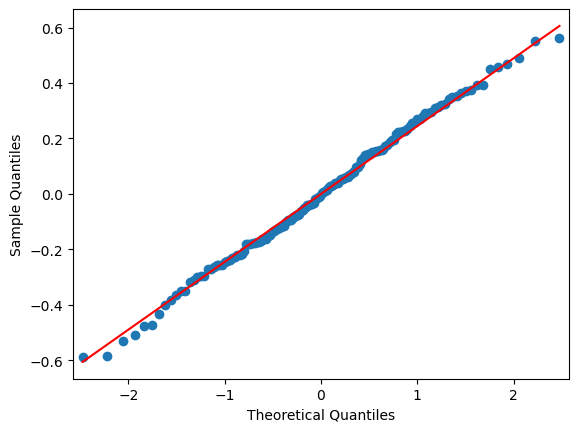

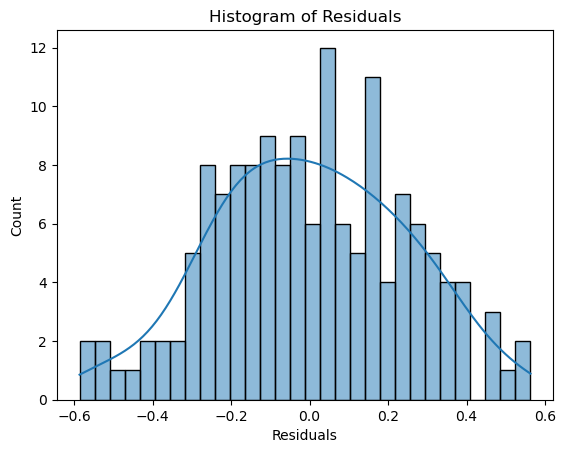

In [83]:
# Тест Шапиро-Уилка:

# Применяется для проверки нормальности распределения остатков.
# Подходит для малых и средних выборок данных.

# Проведение теста Шапиро-Уилка
shapiro_test = stats.shapiro(model.resid)
print(f"Shapiro-Wilk test: {shapiro_test}")

# Q-Q plot
sm.qqplot(model.resid, line='s')
plt.show()

# Гистограмма остатков
sns.histplot(model.resid, kde=True, bins=30)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

# если p-value > 0.05 то данные нормально распределены

In [84]:
# Проверка мультиколлинеарности

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

          feature         VIF
0           const  412.874233
1             sex    1.366994
2             age    4.037733
3          diplom    1.307135
4          family    1.209886
5     proff_group    1.399699
6          is_ceo    1.162216
7         for_lan    1.431786
8         add_ins    1.156171
9   main_activity    1.109486
10       work_exp    3.879228
11        job_sat    1.224833
12          age^2    1.205745


In [85]:
from scipy.stats import zscore
outlier_indices = model.resid[abs(zscore(model.resid)) > 2.5].index
print("Индексы выбросов:")
print(outlier_indices)

Индексы выбросов:
Index([], dtype='int64')


## Борьба с гетероскедастичностью - использование робастных стандартных ошибок

In [87]:
# # Проведение теста Бройша-Пагана
# bp_test = het_breuschpagan(robust_model.resid, robust_model.model.exog)
# labels = ['LM Statistic', 'LM-Test p-value', 'F-Statistic', 'F-Test p-value']
# print(dict(zip(labels, bp_test)))

In [88]:
# # Построение модели с робастными стандартными ошибками
# robust_model = sm.OLS(y, X).fit(cov_type='HC1')

# # Получение результатов модели
# results_table = robust_model.summary()
# print(results_table)

In [89]:
# white_test = het_white(robust_model.resid, robust_model.model.exog)
# labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Statistic p-value']
# print(dict(zip(labels, white_test)))

In [90]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer

In [91]:
stargazer = Stargazer([model1, model2, model3, model])
stargazer.custom_columns(["Модель1", "Модель2", 'Модель3', 'Модель'], [1, 1, 1, 1])
stargazer

In [190]:
X.columns

Index(['const', 'sex', 'age', 'diplom', 'family', 'proff_group', 'is_ceo',
       'for_lan', 'add_ins', 'main_activity', 'work_exp', 'job_sat', 'age^2'],
      dtype='object')

In [192]:
X

,const,sex,age,diplom,family,proff_group,is_ceo,for_lan,add_ins,main_activity,work_exp,job_sat,age^2
1943,1.0,2.0,3.65,3,2,2,2.0,2.0,2.0,12.0,26.0,3.0,-13.3225
1945,1.0,2.0,-18.35,1,2,2,1.0,1.0,2.0,12.0,4.0,4.0,-336.7225
1948,1.0,2.0,8.15,2,2,2,2.0,2.0,2.0,12.0,15.0,3.0,-66.4225
1958,1.0,2.0,25.15,3,1,1,2.0,2.0,2.0,12.0,43.0,2.0,-632.5225
1959,1.0,1.0,-7.85,3,1,1,2.0,2.0,2.0,12.0,16.0,2.0,-61.6225
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11806,1.0,2.0,-11.35,3,1,1,2.0,1.0,2.0,12.0,7.0,1.0,-128.8225
11814,1.0,1.0,-4.35,1,1,1,2.0,2.0,2.0,12.0,17.0,2.0,-18.9225
11815,1.0,2.0,-6.85,1,1,2,2.0,2.0,2.0,12.0,15.0,3.0,-46.9225
11820,1.0,2.0,-22.85,2,2,2,1.0,1.0,2.0,12.0,1.0,2.0,-522.1225


In [201]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
const,150.0,1.000000e+00,0.000000,1.0000,1.0000,1.0000,1.0000,1.0000
sex,150.0,1.506667e+00,0.501630,1.0000,1.0000,2.0000,2.0000,2.0000
age,150.0,-1.136868e-15,12.488485,-22.8500,-9.8500,-2.3500,9.5250,27.6500
diplom,150.0,1.973333e+00,0.850950,1.0000,1.0000,2.0000,3.0000,3.0000
family,150.0,1.526667e+00,0.500961,1.0000,1.0000,2.0000,2.0000,2.0000
proff_group,150.0,1.520000e+00,0.501274,1.0000,1.0000,2.0000,2.0000,2.0000
is_ceo,150.0,1.866667e+00,0.341073,1.0000,2.0000,2.0000,2.0000,2.0000
for_lan,150.0,1.606667e+00,0.490126,1.0000,1.0000,2.0000,2.0000,2.0000
add_ins,150.0,1.886667e+00,0.318062,1.0000,2.0000,2.0000,2.0000,2.0000
main_activity,150.0,1.196000e+01,0.784754,5.0000,12.0000,12.0000,12.0000,13.0000
